In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import corner

In [27]:
data = np.genfromtxt('../data/data_yerr.dat', names=True, comments='#', delimiter='&')
data

array([( 1., 201., 592., 61.), ( 2., 244., 401., 25.),
       ( 3.,  47., 583., 38.), ( 4., 287., 402., 15.),
       ( 5., 203., 495., 21.), ( 6.,  58., 173., 15.),
       ( 7., 210., 479., 27.), ( 8., 202., 504., 14.),
       ( 9., 198., 510., 30.), (10., 158., 416., 16.),
       (11., 165., 393., 14.), (12., 201., 442., 25.),
       (13., 157., 317., 52.), (14., 131., 311., 16.),
       (15., 166., 400., 34.), (16., 160., 337., 31.),
       (17., 186., 423., 42.), (18., 125., 334., 26.),
       (19., 218., 533., 16.), (20., 146., 344., 22.)],
      dtype=[('index', '<f8'), ('x', '<f8'), ('y', '<f8'), ('sigm_y', '<f8')])

In [28]:
x = data['x']  
y = data['y']
sigma_y = data['sigm_y']

In [49]:
def build_model(m, b):
    def model(x):
        return m * x + b
    return model

def lnlikelihood(m, b, x=data['x'], y=data['y'], sigma_y=sigma_y):
    model = build_model(m, b)
    lnlike = -0.5 * np.sum(np.log(2 * np.pi * sigma_y**2)) - np.sum((y - model(x))**2 / (2 * sigma_y**2))
    return lnlike

def prior(m, b):
    return 1

initial_m = 2
initial_b = 100

m = initial_m
b = initial_b

p_current = lnlikelihood(m, b)

chain_m = [m]
chain_b = [b]
probs = [p_current]

In [43]:
niter = 1000000
for i in range(niter):
    samples = []
    m_proposed = norm.rvs(loc=m, scale=2)  
    b_proposed = norm.rvs(loc=b, scale=100)  

    p_p = lnlikelihood(m_proposed, b_proposed)
    
    
    α = np.exp(p_p - p_current) 
    u = np.random.uniform()
    accepted = u < α
    
    if accepted:
        m, b = m_proposed, b_proposed
        p_current = p_p
        
    chain_m.append(m)
    chain_b.append(b)
    probs.append(p_current)

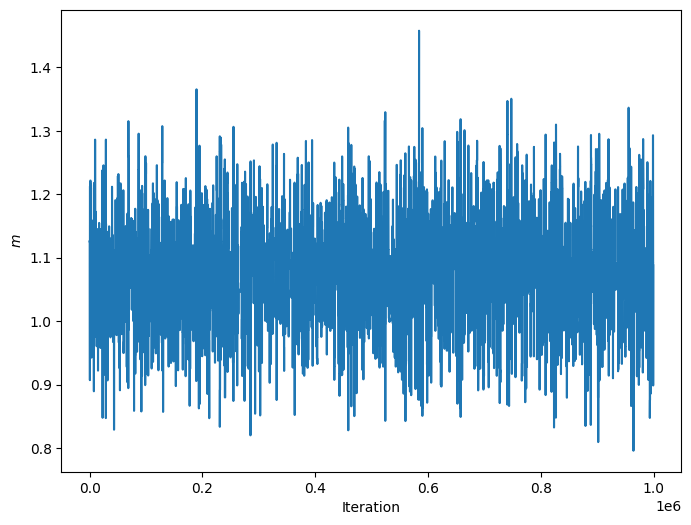

In [44]:
burnin_length = 1000

plt.figure(figsize=(8, 6))
plt.plot(chain_m[burnin_length:])
plt.xlabel('Iteration')
plt.ylabel('$m$')
plt.show()

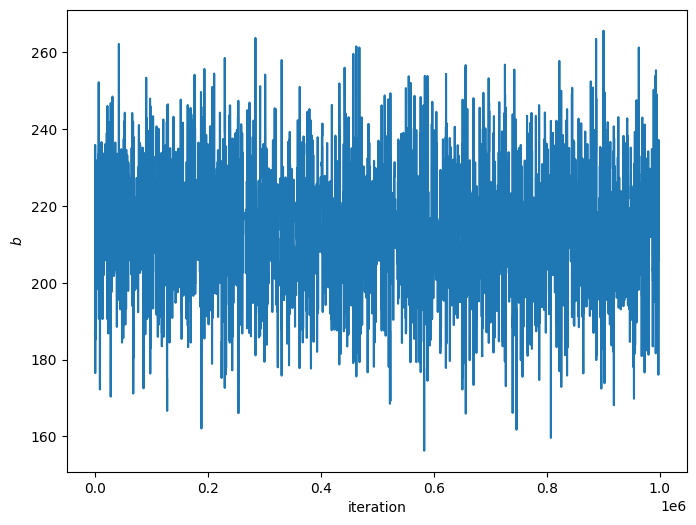

In [45]:
burnin_length = 2000

plt.figure(figsize=(8, 6))
plt.plot(chain_b[burnin_length:])
plt.xlabel('iteration')
plt.ylabel('$b$');

In [46]:
chain_m = np.array(chain_m)
chain_b = np.array(chain_b)
chain_data = np.column_stack((chain_m, chain_b, probs))
print(chain_data)

[[   2.          100.         -354.18090647]
 [   2.          100.         -354.18090647]
 [   2.          100.         -354.18090647]
 ...
 [   1.08801646  206.00302548 -227.95400092]
 [   1.08801646  206.00302548 -227.95400092]
 [   1.08801646  206.00302548 -227.95400092]]


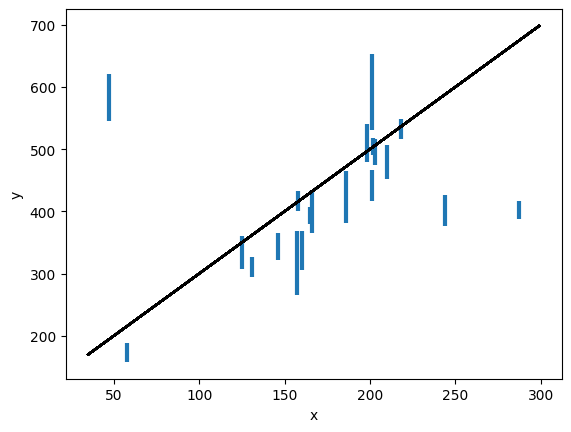

In [50]:
plt.errorbar(data['x'], data['y'], yerr=data['sigm_y'], linewidth=0, elinewidth=3, label='Data')
plt.xlabel('x')
plt.ylabel('y')

xlow, xhigh = plt.xlim()
test_x = np.linspace(xlow, xhigh, 100)

for _ in range(125):  
    m_sample = np.random.choice(chain_m)
    b_sample = np.random.choice(chain_b)
    
    model = lambda x: m_sample * x + b_sample
    predictions = model(test_x)

    plt.plot(test_x, predictions, color='black', alpha=0.5)

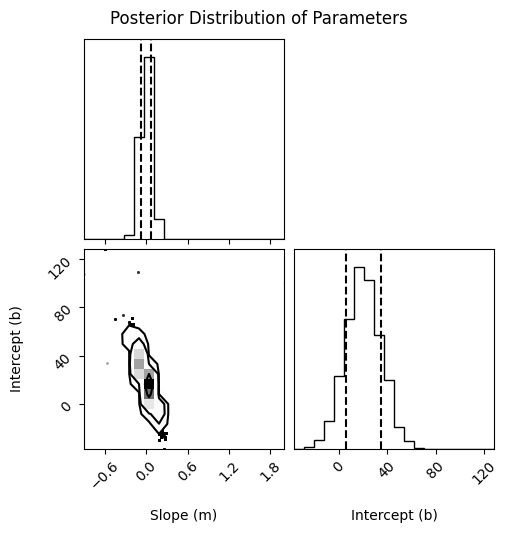

In [35]:
fig = corner.corner(np.vstack((chain_m, chain_b)).T, 
                     labels=["Slope (m)", "Intercept (b)"], 
                     quantiles=(0.16, 0.84), 
                     levels=(0.68, 0.95, 0.997))
fig.suptitle("Posterior Distribution of Parameters")
plt.show()


Text(0.5, 1.0, '2D Posterior Density of m and b')

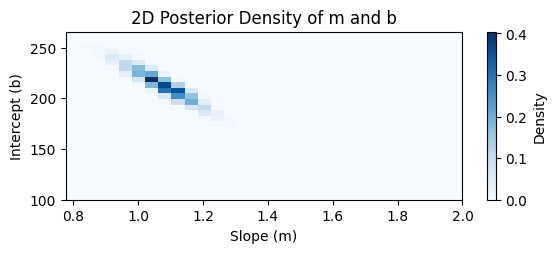

In [48]:
plt.subplot(2, 1, 1)
plt.hist2d(chain_m, chain_b, bins=30, cmap='Blues', density=True)
plt.colorbar(label='Density')
plt.xlabel('Slope (m)')
plt.ylabel('Intercept (b)')
plt.title('2D Posterior Density of m and b')

Q1.

In [37]:
df = pd.read_csv('../data/gaiadr3_solar_neighborhood.csv')
df

,mg,bp_rp,parallax
0,10.390250,2.731872,10.000008
1,8.608481,2.025819,10.000029
2,4.267759,0.880858,10.000032
3,10.506658,2.649735,10.000066
4,12.077941,2.940875,10.000111
...,...,...,...
227624,11.758283,2.834036,336.026602
227625,9.521769,2.215609,392.752945
227626,14.129570,4.184836,415.179416
227627,11.883816,2.833697,546.975940


In [38]:
filtered_data = df[df['parallax'] > 40]

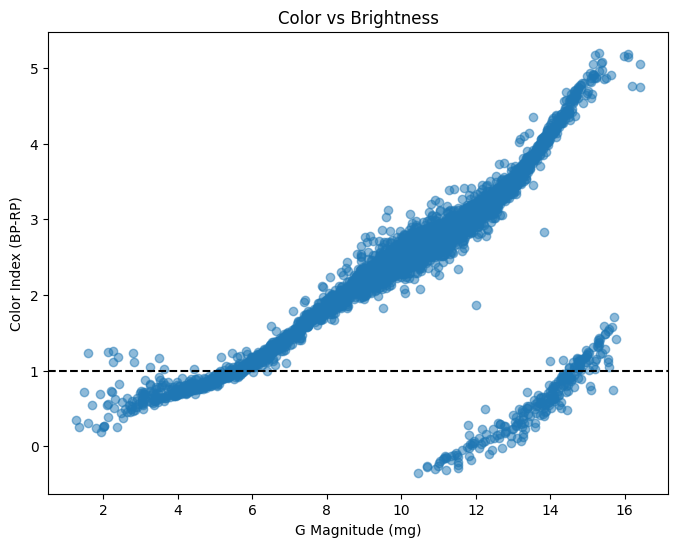

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['mg'], filtered_data['bp_rp'], alpha=0.5)  
plt.xlabel('G Magnitude (mg)')
plt.ylabel('Color Index (BP-RP)')
plt.title('Color vs Brightness')
plt.axhline(y=1, color='black', linestyle='--')
plt.show()

In [40]:
afterExclude_df = filtered_data[filtered_data['bp_rp'] > 1]  
print(afterExclude_df)

               mg     bp_rp    parallax
223559  11.544313  2.992254   40.002314
223560  13.563787  3.794676   40.004848
223561  10.197586  2.492932   40.007115
223562  12.769197  3.373776   40.014745
223563  12.413716  3.135756   40.019696
...           ...       ...         ...
227624  11.758283  2.834036  336.026602
227625   9.521769  2.215609  392.752945
227626  14.129570  4.184836  415.179416
227627  11.883816  2.833697  546.975940
227628  13.411743  3.804580  768.066539

[3549 rows x 3 columns]


In [ ]:
import pandas as pd
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt


# Prepare the data for modeling
bp_rp = afterExclude_df['bp_rp'].values
M_G = afterExclude_df['M_G'].values  # Ensure this column exists

# Define the model
with pm.Model() as model:
    # Priors for slope and intercept
    m = pm.Uniform('m', lower=-10, upper=10)
    b = pm.Uniform('b', lower=-10, upper=10)
    
    # Prior for the scatter
    sigma_MG = pm.HalfNormal('sigma_MG', sigma=5)

    # Expected value of M_G
    mu = m * bp_rp + b

    # Likelihood
    likelihood = pm.Normal('likelihood', mu=mu, sigma=sigma_MG, observed=M_G)

    # Inference
    trace = pm.sample(2000, tune=1000)

# Summary of the trace
pm.summary(trace)

# Plotting the results
pm.traceplot(trace)
plt.show()
